In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
import string
import requests

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tagantemartins/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tagantemartins/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
reviews = pd.read_csv("reviews.csv")

In [3]:
reviews.keys()
reviews.head(5)

,book_title,summary,text,word_tokens,word_tokens_count,sentence_tokens,sentence_tokens_count,average_token_length,rounded_average_token_length,average_sentence_length,rounded_average_sentence_length,lexical_diversity,text_lower,text_lower_no_ponctuation,most_common_words
0,Its Only Art If Its Well Hung!,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,"['This', 'is', 'only', 'for', 'Julie', 'Strain...",99,"['This is only for Julie Strain fans.', ""It's ...",2,3.757576,4,49.500000,50,0.686869,this is only for julie strain fans. it's a col...,this is only for julie strain fans its a colle...,"['This', 'Julie', 'Strain', 'fans', '.', 'It',..."
1,Dr. Seuss: American Icon,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,"['I', 'do', ""n't"", 'care', 'much', 'for', 'Dr....",282,"[""I don't care much for Dr. Seuss but after re...",6,4.156028,4,47.000000,47,0.588652,i don't care much for dr. seuss but after read...,i dont care much for dr seuss but after readin...,"['I', ""n't"", 'care', 'much', 'Dr.', 'Seuss', '..."
2,Dr. Seuss: American Icon,Essential for every personal and Public Library,"If people become the books they read and if ""t...","['If', 'people', 'become', 'the', 'books', 'th...",350,['If people become the books they read and if ...,10,4.140000,4,35.000000,35,0.537143,"if people become the books they read and if ""t...",if people become the books they read and if th...,"['If', 'people', 'become', 'books', 'read', '`..."
3,Dr. Seuss: American Icon,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...","['Theodore', 'Seuss', 'Geisel', '(', '1904-199...",780,"['Theodore Seuss Geisel (1904-1991), aka &quot...",11,3.978205,4,70.909091,71,0.434615,"theodore seuss geisel (1904-1991), aka &quot;d...",theodore seuss geisel 19041991 aka quotdr seus...,"['Theodore', 'Seuss', 'Geisel', '(', '1904-199..."
4,Dr. Seuss: American Icon,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,"['Philip', 'Nel', '-', 'Dr.', 'Seuss', ':', 'A...",316,['Philip Nel - Dr. Seuss: American IconThis is...,12,4.025316,4,26.333333,26,0.572785,philip nel - dr. seuss: american iconthis is b...,philip nel dr seuss american iconthis is basi...,"['Philip', 'Nel', '-', 'Dr.', 'Seuss', ':', 'A..."


Word Count Distribution in Reviews

<Axes: title={'center': 'Word Count Distribution in Reviews'}, xlabel='Word Count', ylabel='Frequency'>

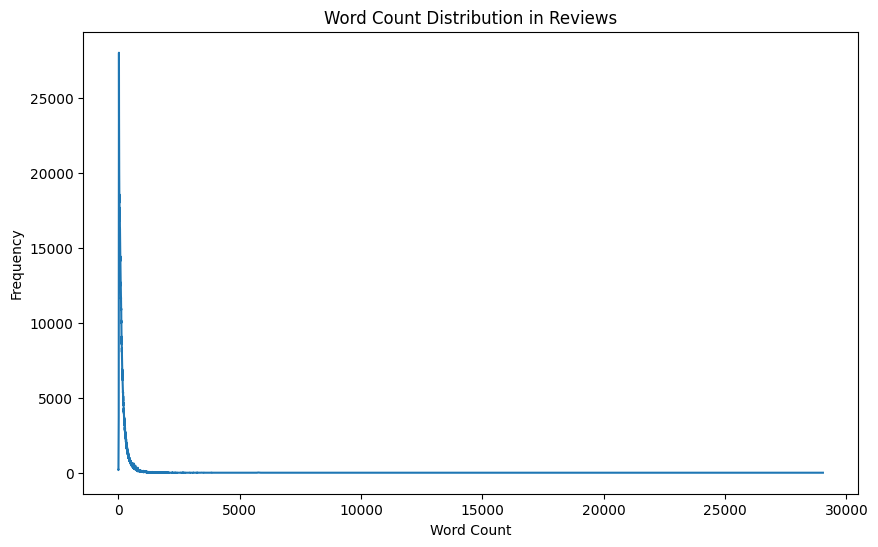

In [4]:
reviews.word_tokens_count.value_counts().sort_index().plot(kind='line',
                                                    title='Word Count Distribution in Reviews',
                                                    legend=False, figsize=(10, 6),
                                                    xlabel='Word Count',
                                                    ylabel='Frequency')

Word Count Interval Distribution in Reviews

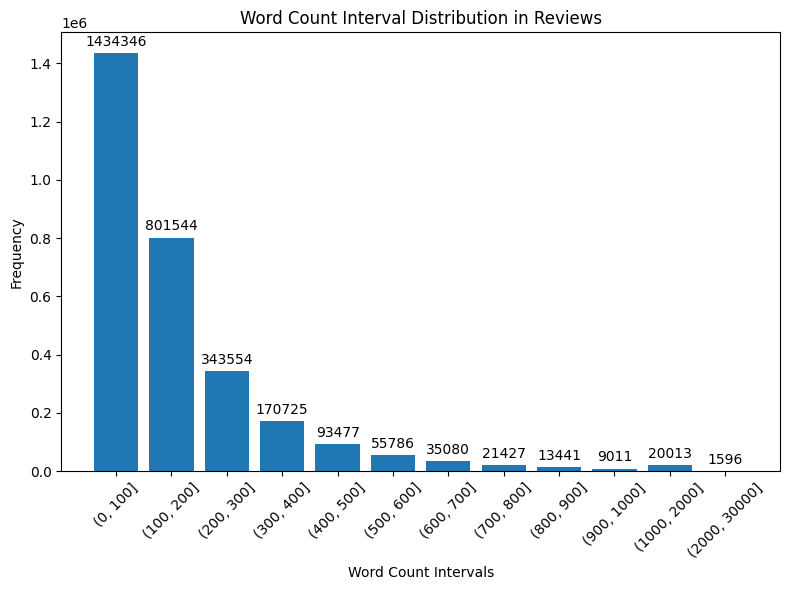

In [5]:
max_word_count = math.ceil(reviews['word_tokens_count'].max() / 1000) * 1000
word_count_intervals = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, max_word_count]
word_count_distribution = pd.cut(reviews['word_tokens_count'], bins=word_count_intervals).value_counts().sort_index()
plt.figure(figsize=(8, 6))
bars = plt.bar(word_count_distribution.index.astype(str), word_count_distribution.values)
plt.title('Word Count Interval Distribution in Reviews')
plt.xlabel('Word Count Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Word Count Interval Distribution in Reviews (Percentage)

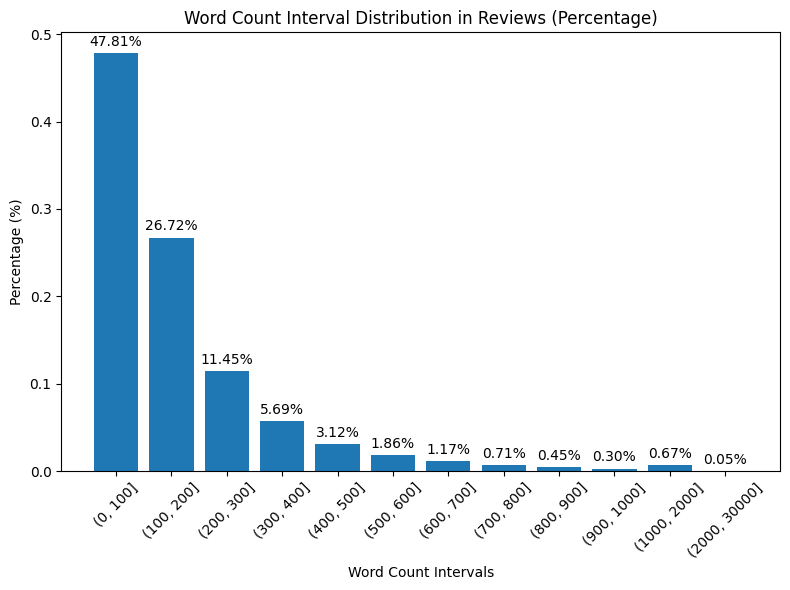

In [6]:
word_count_distribution = pd.cut(reviews['word_tokens_count'], bins=word_count_intervals).value_counts(normalize=True).sort_index()

# Create a bar chart to visualize the interval distribution in percentage
plt.figure(figsize=(8, 6))
bars = plt.bar(word_count_distribution.index.astype(str), word_count_distribution.values)
plt.title('Word Count Interval Distribution in Reviews (Percentage)')
plt.xlabel('Word Count Intervals')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
# Annotate each bar with its exact percentage value
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{100*height:2.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


Average Word Length

(0.0, 20.0)

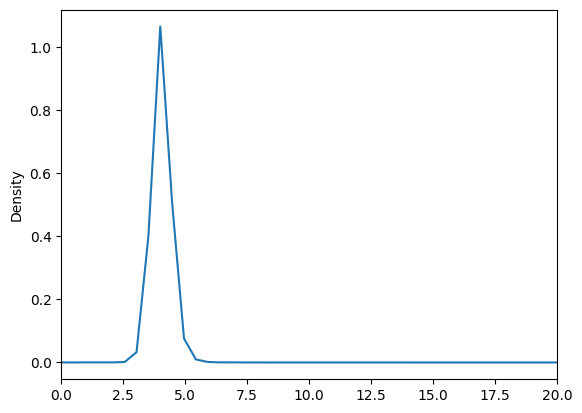

In [7]:
reviews['average_token_length'].plot(kind='kde')
plt.xlim(0, 20)

Average Word Length Distribution in Reviews

<Axes: title={'center': 'Average Word Length Distribution in Reviews'}, xlabel='Average Word Length', ylabel='Frequency'>

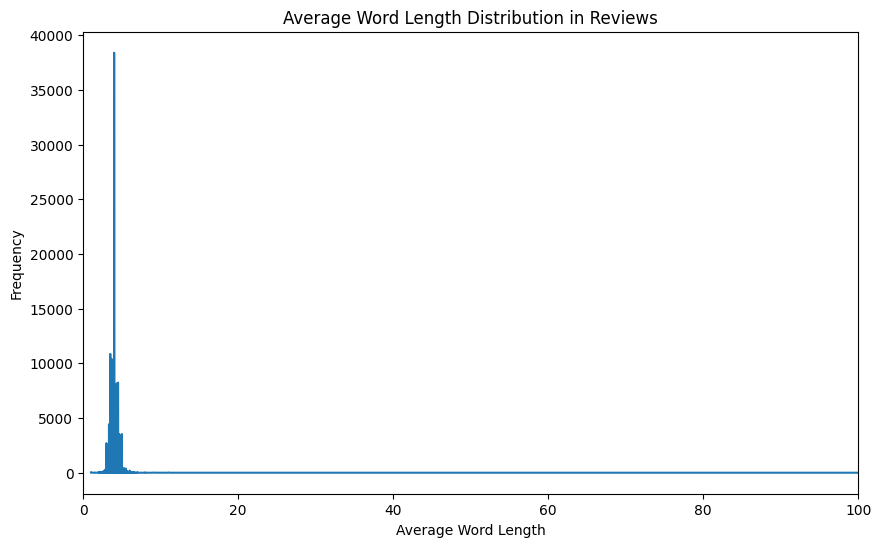

In [8]:
reviews.average_token_length.value_counts().sort_index().plot(kind='line', title='Average Word Length Distribution in Reviews', legend=False, figsize=(10, 6), rot=0, y='text', xlabel='Average Word Length', ylabel='Frequency', xlim=(0, 100))

[Text(0, 0, '85'),
 Text(0, 0, '1181'),
 Text(0, 0, '226816'),
 Text(0, 0, '2.42459e+06'),
 Text(0, 0, '340222'),
 Text(0, 0, '6428'),
 Text(0, 0, '419'),
 Text(0, 0, '133'),
 Text(0, 0, '39'),
 Text(0, 0, '22'),
 Text(0, 0, '26'),
 Text(0, 0, '4'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

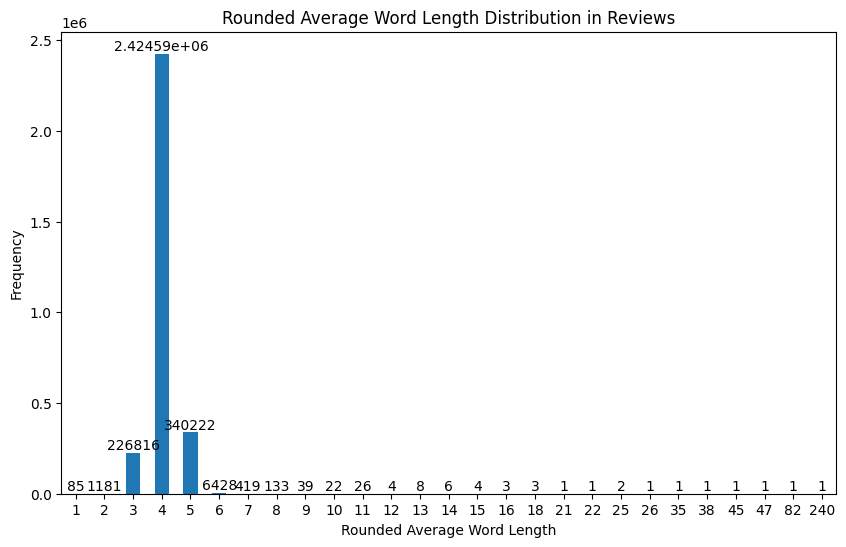

In [9]:
reviews.rounded_average_token_length.value_counts().sort_index().plot(kind='bar', title='Rounded Average Word Length Distribution in Reviews', legend=False, figsize=(10, 6), rot=0, y='text', xlabel='Rounded Average Word Length', ylabel='Frequency', xlim=(0, 50)).bar_label(container=plt.gca().containers[0])

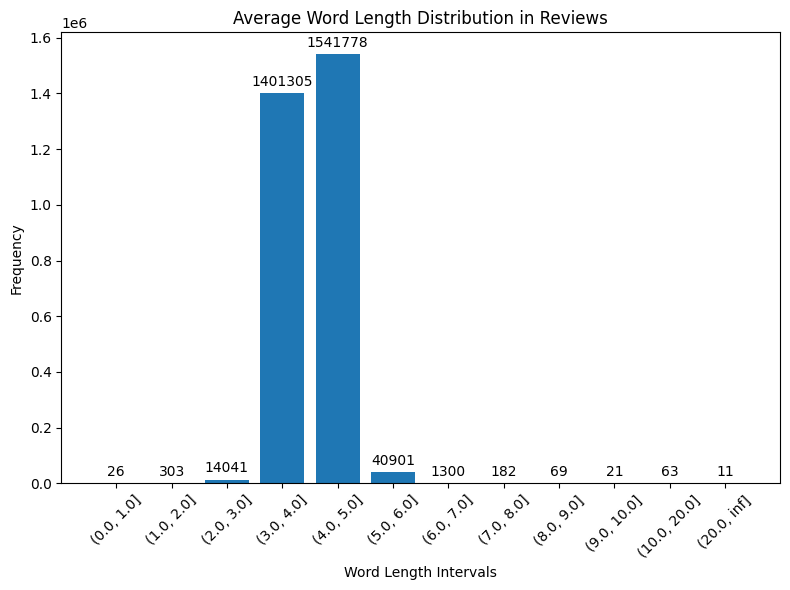

In [10]:
average_word_length_intervals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, float('inf')]
average_word_length_distribution = pd.cut(reviews['average_token_length'], bins=average_word_length_intervals).value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(average_word_length_distribution.index.astype(str), average_word_length_distribution.values)
plt.title('Average Word Length Distribution in Reviews')
plt.xlabel('Word Length Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# Annotate each bar with its exact percentage value
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

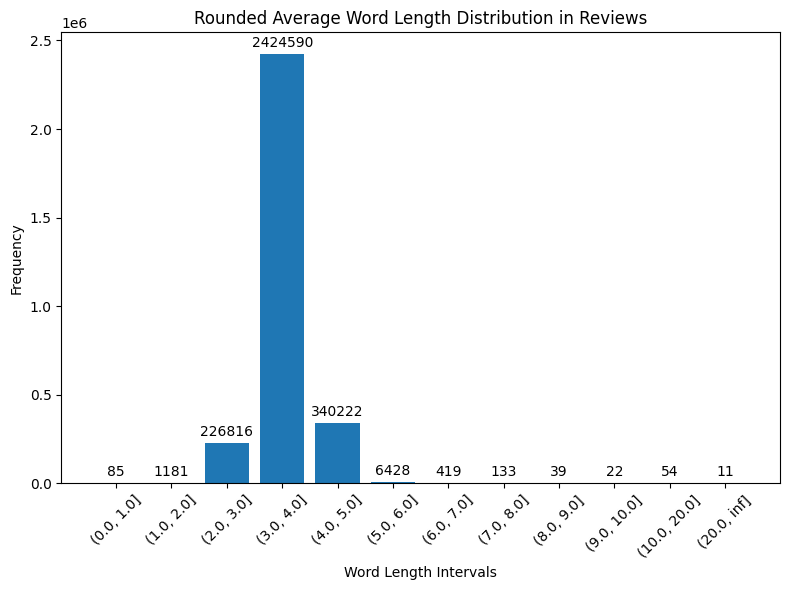

In [11]:
rounded_average_word_length_intervals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, float('inf')]
rounded_average_word_length_distribution = pd.cut(reviews['rounded_average_token_length'], bins=rounded_average_word_length_intervals).value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(rounded_average_word_length_distribution.index.astype(str), rounded_average_word_length_distribution.values)
plt.title('Rounded Average Word Length Distribution in Reviews')
plt.xlabel('Word Length Intervals')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# Annotate each bar with its exact percentage value
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Sentence Count

<Axes: title={'center': 'Number of Sentences Distribution in Reviews'}, xlabel='Number of Sentences', ylabel='Frequency'>

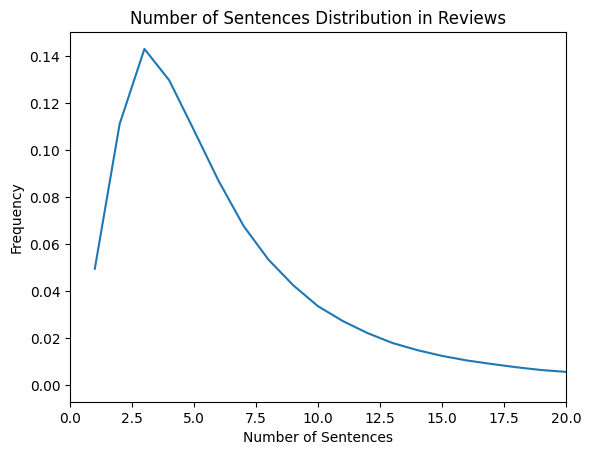

In [12]:
reviews.sentence_tokens_count.value_counts(normalize=True).sort_index().plot(title='Number of Sentences Distribution in Reviews', xlabel='Number of Sentences', ylabel='Frequency', xlim=(0,20))

Average Sentence Length

<Axes: title={'center': 'Average Sentence Length Distribution in Reviews'}, xlabel='Average Sentence Length', ylabel='Frequency'>

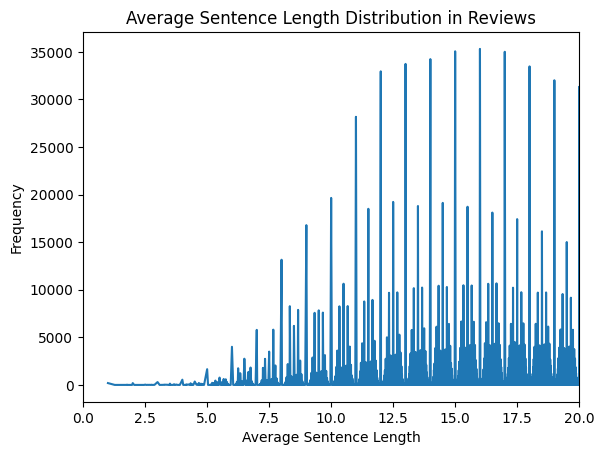

In [13]:
reviews.average_sentence_length.value_counts(normalize=not True).sort_index().plot(title='Average Sentence Length Distribution in Reviews', xlabel='Average Sentence Length', ylabel='Frequency', xlim=(0,20))

Average Sentence Length

<Axes: title={'center': 'Rounded Average Sentence Length Distribution in Reviews'}, xlabel='Rounded Average Sentence Length', ylabel='Frequency'>

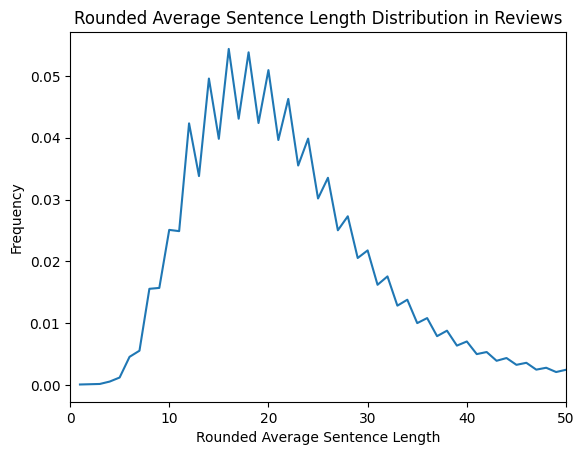

In [14]:
reviews.rounded_average_sentence_length.value_counts(normalize=True).sort_index().plot(
    title='Rounded Average Sentence Length Distribution in Reviews',
    xlabel='Rounded Average Sentence Length',
    ylabel='Frequency',
    xlim=(0,50))

Lexical Diversity

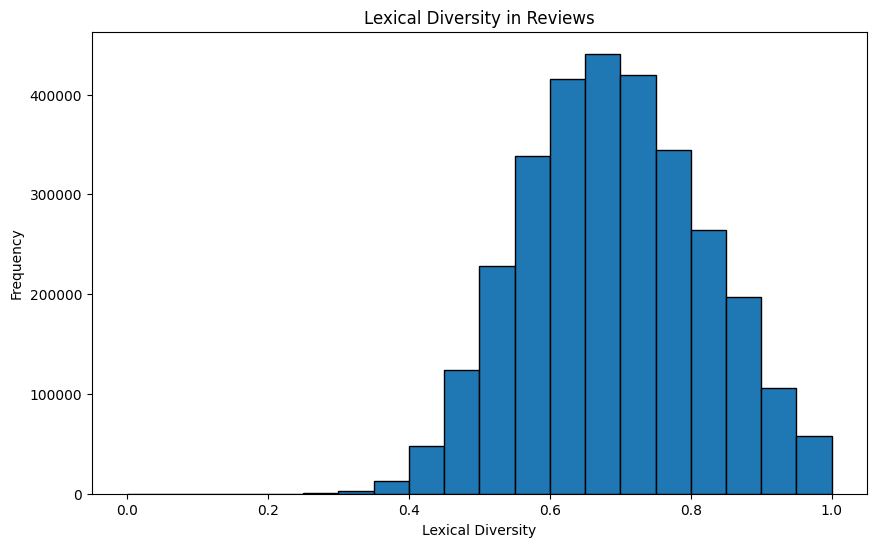

In [15]:
# Plot Lexical Diversity
plt.figure(figsize=(10, 6))
plt.hist(reviews['lexical_diversity'], bins=20, edgecolor='k')
plt.title('Lexical Diversity in Reviews')
plt.xlabel('Lexical Diversity')
plt.ylabel('Frequency')
plt.show()

Most Common Words

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
all_words = [word for sublist in reviews['most_common_words'].tolist() for word in sublist]

In [18]:
fdist = FreqDist(all_words)

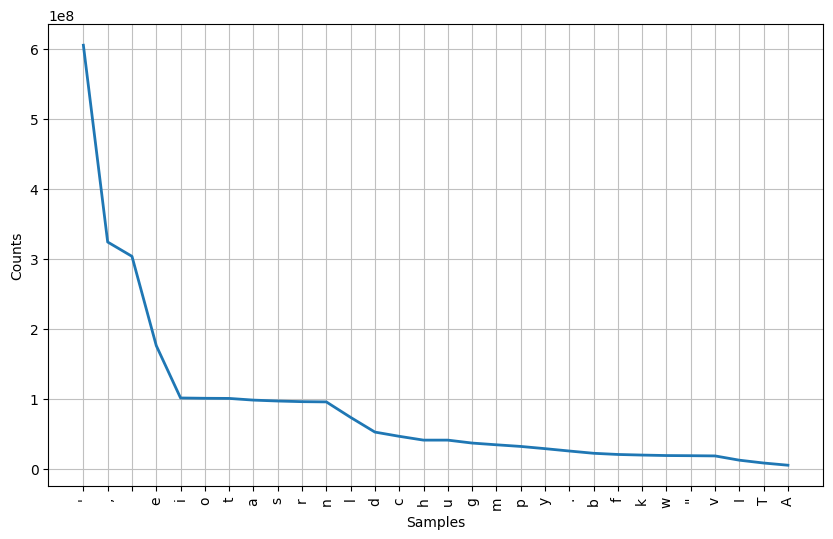

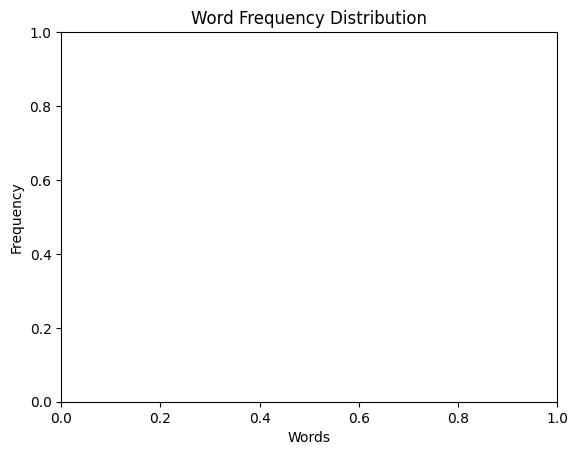

In [19]:
common_words = fdist.most_common(10)

# Plot Most Common Words
plt.figure(figsize=(10, 6))
fdist.plot(30, cumulative=False)
plt.title('Word Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

N-grams

In [20]:
def get_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    return n_grams

n = 2  # Change 'n' to desired n-gram length
reviews['n_grams'] = reviews['text'].apply(lambda x: get_ngrams(str(x), n))
all_ngrams = [ngram for sublist in reviews['n_grams'].tolist() for ngram in sublist]
fdist_ngrams = FreqDist(all_ngrams)
common_ngrams = fdist_ngrams.most_common(10)

: 